In [50]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import seaborn as sns

In [25]:
images = np.load("./images.npy")
images = np.reshape(images, (len(images), 28 * 28))

labels = np.load("./labels.npy")

In [26]:
seed = 42
np.random.seed(seed)

In [27]:
print(images.shape)
print(labels.shape)

(6500, 784)
(6500,)


In [28]:
labels = tf.keras.utils.to_categorical(labels)

In [29]:
labels.shape

(6500, 10)

## Model Spplitting (Train, Validation, Test)

In [30]:
# training = 60%, validation = 15%, testing = 25%

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.40, random_state=seed, stratify=labels
)
x_test, x_validation, y_test, y_validation = train_test_split(
    x_test, y_test, test_size=0.375, random_state=seed, stratify=y_test
)
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(3900, 784)
(975, 784)
(1625, 784)


## Model Selection

In [32]:
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# model = Sequential() # declare model
# model.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
# model.add(Activation('relu'))

In [33]:
# Our Model
# model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_normal')) # second layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_normal')) # second layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_normal')) # second layer
# model.add(Activation('relu'))
# model.add(Dense(50, kernel_initializer='random_uniform')) # fourth layer
# model.add(Activation('tanh'))

In [34]:
# model.add(Dense(10, kernel_initializer='he_normal')) # last layer
# model.add(Activation('softmax'))

In [35]:
# Compile Model
# model.compile(optimizer='sgd',
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

In [36]:
model = load_model("best_trained_model.h5")

In [37]:
# Train Model
history = model.fit(x_train, y_train, 
                    validation_data = (x_validation, y_validation), 
                    epochs=50, 
                    batch_size=32)

Epoch 1/50
122/122 [==============================] - 1s 5ms/step - loss: 0.3776 - accuracy: 0.8708 - val_loss: 0.7855 - val_accuracy: 0.7149
Epoch 2/50
122/122 [==============================] - 1s 4ms/step - loss: 0.5396 - accuracy: 0.8092 - val_loss: 0.8029 - val_accuracy: 0.7395
Epoch 3/50
122/122 [==============================] - 1s 6ms/step - loss: 0.4748 - accuracy: 0.8295 - val_loss: 0.6160 - val_accuracy: 0.7938
Epoch 4/50
122/122 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8564 - val_loss: 0.6053 - val_accuracy: 0.8113
Epoch 5/50
122/122 [==============================] - 1s 5ms/step - loss: 0.3671 - accuracy: 0.8685 - val_loss: 0.8073 - val_accuracy: 0.7631
Epoch 6/50
122/122 [==============================] - 1s 5ms/step - loss: 0.4019 - accuracy: 0.8521 - val_loss: 0.5931 - val_accuracy: 0.8072
Epoch 7/50
122/122 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8631 - val_loss: 0.5717 - val_accuracy: 0.8246
Epoch 

In [38]:
# Report Results
print(history.history)
plt.plot(
    range(len(history.history.get("accuracy"))),
    history.history.get("accuracy"),
    label="accuracy",
)
plt.plot(
    range(len(history.history.get("val_accuracy"))),
    history.history.get("val_accuracy"),
    label="val_accuracy",
)
plt.legend(loc="lower right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("accuracy.png")

plt.clf()

plt.plot(
    range(len(history.history.get("loss"))), history.history.get("loss"), label="loss"
)
plt.plot(
    range(len(history.history.get("val_loss"))),
    history.history.get("val_loss"),
    label="val_loss",
)
plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("loss.png")

plt.clf()

{'loss': [0.3775692582130432, 0.5395737886428833, 0.47475630044937134, 0.4101094901561737, 0.3671312630176544, 0.4019013047218323, 0.36604899168014526, 0.3483787178993225, 0.3525811433792114, 0.3176632225513458, 0.3133959472179413, 0.31007489562034607, 0.29669228196144104, 0.2894948422908783, 0.27061280608177185, 0.2659144699573517, 0.2659450173377991, 0.2626139223575592, 0.2657036781311035, 0.25106051564216614, 0.21523389220237732, 0.2214246541261673, 0.23684684932231903, 0.24294660985469818, 0.22701963782310486, 0.2076580822467804, 0.22978419065475464, 0.22260402143001556, 0.1743091195821762, 0.16444285213947296, 0.18687571585178375, 0.1747513711452484, 0.18821826577186584, 0.17535869777202606, 0.19883441925048828, 0.16851329803466797, 0.16154907643795013, 0.14814002811908722, 0.16449129581451416, 0.15955513715744019, 0.159650519490242, 0.14013510942459106, 0.1648392528295517, 0.14099128544330597, 0.1395009607076645, 0.12823861837387085, 0.11090924590826035, 0.17909054458141327, 0.12

<Figure size 432x288 with 0 Axes>

In [39]:
# Model Prediction
prediction = model.predict(x_test)

In [40]:
# Model Evaluation
scores = model.evaluate(x_test, y_test, verbose=0)
print("\n")
print(scores)
accuracy = scores[1] * 100
error = 100 - scores[1] * 100
print("Accuracy: %.2f%%" % accuracy)
print("Error: %.2f%%" % error)

    




[0.5819034576416016, 0.8523076772689819]
Accuracy: 85.23%
Error: 14.77%


Predicted Label    0    1    2    3    4    5    6    7    8    9   All
True Label                                                             
0                123    3    2   10    1    0   21    0    2    0   162
1                  0  161    0    1    1    0    0    0    0    0   163
2                  4    1  118    2   21    1   15    0    1    0   163
3                  4    5    2  142    4    0    4    0    1    0   162
4                  0    0   24    3  127    0    9    0    0    0   163
5                  1    0    0    0    0  151    0    4    1    5   162
6                 14    0   19    5   11    0  109    0    3    1   162
7                  0    0    0    0    0    7    0  143    2   10   162
8                  1    0    2    4    1    0    1    1  153    0   163
9                  0    0    0    0    0    1    0    3    1  158   163
All              147  170  167  167  166  160  159  151  164  174  1625


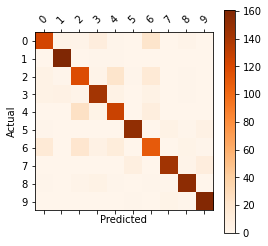

In [43]:
projection, actual = [], []

# Iterate through predictions, determining which value recieved the highest prediction and
#   marking that value in a list (denoting our prediction)
for p in prediction:

    # Reset max value, index, and max index each iteration
    maximum = float(0)
    index, max_index = 0, -1

    # Iterate through each set of preductions determining the highest predicted value
    for n in p:
        if float(n) > maximum:
            maximum = float(n)
            max_index = index
        index += 1

    # Mark our projection for this set in our list
    projection.append(max_index)

# Convert test set (actuals) back to standard numerical format
for t in y_test:
    actual.append(np.argmax(t))


# Generate Confusion Matrix
y_actual = pd.Series(actual, name="Actual")
y_predict = pd.Series(projection, name="Predicted")
confusion_matrix = pd.crosstab(y_actual, y_predict)

# Generate normalized confusion matrix
norm_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

# Generate full confusion matrix with totals
full_confusion_matrix = pd.crosstab(
    y_actual,
    y_predict,
    rownames=["True Label"],
    colnames=["Predicted Label"],
    margins=True,
)

#print(norm_confusion_matrix)
print(full_confusion_matrix)

cmap = mpl.cm.get_cmap("Oranges")
plt.matshow(confusion_matrix, cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(confusion_matrix.columns))
plt.xticks(tick_marks, confusion_matrix.columns, rotation=45)
plt.yticks(tick_marks, confusion_matrix.index)

plt.ylabel(confusion_matrix.index.name)
plt.xlabel(confusion_matrix.columns.name)

plt.show()

Text(33.0, 0.5, 'Actual')

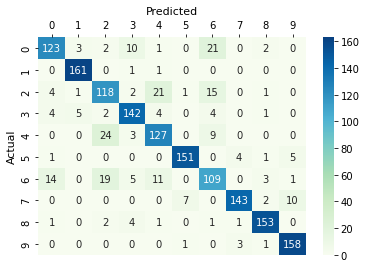

In [75]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_actual, y_predict)
x = sns.heatmap(cf_matrix, vmin=0, vmax=163, annot=True,fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', loc="center", size=11)

